In [1]:
import sympy as sp
sp.init_printing(use_latex ='mathjax')

import matplotlib.pyplot as plt
import numpy as np
import math
import seaborn as sns

In [2]:
#Define all variables

#individual springs that correspond to individual masses
k1,k2,k3 = (1,1,1)

#springs that connect two masses
k12, k23 = (1,0.01)

#damping coefficients and forc
g1, g2, g3 = (0.1,0.1, 0.1)
 
#masses
m1, m2, m3 = (1,1,1)

#Driving force amplitude
F = (1000)

#driving frequency (leave as variable)
wd = sp.symbols('\omega_d')

In [3]:
#Other graphing options

#make k3 a symbol for avoided crossing plot (comment out ks from above)
#k2,k3 = (1,1)
#k1 = sp.symbols('\kappa_1')

#make m3 a symbol for difference plot (comment out ms and wd from above)
#k1,k2 = (1,1)
#k3 = sp.symbols('\k_3')

In [4]:
#Solve for the eigenefrequencies of steady state solutions

steadyState = sp.Matrix([[(k1/m1) + (k12/m1), -k12/m1, 0], [-(k12/
  m2), (k2/m2) + (k12/m2) + (k23/m2), -(k23/m2)], [0, -(k23/
  m3), (k3/m3) + (k23/m3)]])

(e1,mult1,A), (e2,mult2,B), (e3,mult3,C)= steadyState.eigenvects()

#Neglect imaginary part because it is very small..?
#w1, w2, w3 = (math.sqrt(e1-((g1/m1)**2)/4), math.sqrt(e2-((g2/m2)**2)/4), math.sqrt(e3-((g3/m3)**2)/4))
w1, w2, w3 = (sp.sqrt(sp.re(e1)-((g1/m1)**2)/4), sp.sqrt(sp.re(e2)-((g2/m2)**2)/4), sp.sqrt(sp.re(e3)-((g3/m3)**2)/4))

In [5]:
#plot avoided crossing when k1 is variable
# p = sp.plot((w1,(k1,0,10)),(w2,(k1,0,10)), (w3, (k1,0,10)),title='Avoided Crossing', xlabel='k1', ylabel='Freq');
# p[0].line_color = 'black'
# p[1].line_color = '#8E0152'
# p[2].line_color = '#276419'

# p.show()

In [6]:
#Solve for driving amplitudes and phase

#Uncomment to set m3 as variable
#wd=w2

#Matrix for complex equations of motion
driven = sp.Matrix([[-wd**2 + 1j*wd*g1/m1 + (k1/m1) + (k12/m1), -k12/m1, 0], [-k12/m2, -wd**2 + 
  1j*wd*g2/m2 + (k2/m2) + (k12/m2) + (k23/m2), -k23/m2], [0, -k23/m3, -wd**2 + 
  1j*wd*g3/m3 + (k3/m3) + (k23/m3)]])


#Matrices for Cramer's Rule
driven_m1 = sp.Matrix([[F/m1, -k12/m1, 0], [0, -wd**2 + 
  1j*wd*g2/m2 + (k2/m2) + (k12/m2) + (k23/m2), -k23/m2], [0, -k23/m3, -wd**2 + 
  1j*wd*g3/m3 + (k3/m3) + (k23/m3)]])

driven_m2 = sp.Matrix([[-wd**2 + 1j*wd*g1/m1 + (k1/m1) + (k12/m1), F/m1, 0], [-k12/m2, 0, -k23/m2], [0,0, -wd**2 + 
  1j*wd*g3/m3 + (k3/m3) + (k23/m3)]])

driven_m3 = sp.Matrix([[-wd**2 + 1j*wd*g1/m1 + (k1/m1) + (k12/m1), -k12/m1, F/m1], [-k12/m2, -wd**2 + 
  1j*wd*g2/m2 + (k2/m2) + (k12/m2) + (k23/m2),0], [0, -k23/m3,0]])

#Apply Cramer's Rule
Cr1, Cr2, Cr3 = (driven_m1.det()/driven.det(),driven_m2.det()/driven.det(),driven_m3.det()/driven.det(),)

#Solve for phases for each mass
delta1 = sp.arg(Cr1)
delta2 = sp.arg(Cr2)
delta3 = sp.arg(Cr3)

#Wrap phases for plots

wrap1 = (delta1)%(2*np.pi)-np.pi
wrap2 = (delta2)%(2*np.pi)-np.pi
wrap3 = (delta3)%(2*np.pi)-np.pi

#Solve for amplitude coefficients
amp1 = sp.re(Cr1)/sp.cos(delta1)
amp2 = sp.re(Cr2)/sp.cos(delta2)
amp3 = sp.re(Cr3)/sp.cos(delta3)

In [8]:
#Make Plots with matplotlib

#lamdify sympy expressions to be functions

delta1_f = sp.lambdify(wd,delta1)
delta2_f = sp.lambdify(wd,delta2)
delta3_f = sp.lambdify(wd,delta3)

wrap1_f=sp.lambdify(wd,wrap1)
wrap2_f=sp.lambdify(wd,wrap2)
wrap3_f=sp.lambdify(wd,wrap3)

amp1_f = sp.lambdify(wd,amp1)
amp2_f = sp.lambdify(wd,amp2)
amp3_f = sp.lambdify(wd,amp3)

#Make an array of wd values

wd_vals = np.linspace(0.001, 3, 500)

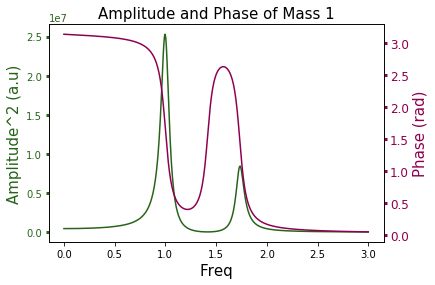

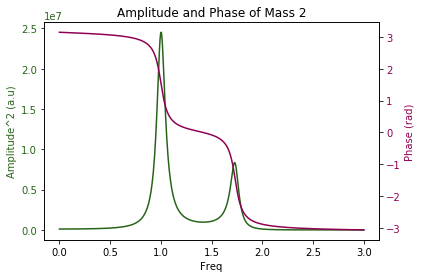

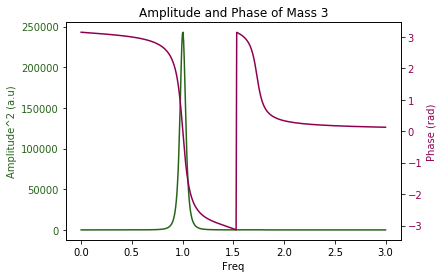

In [9]:
#Make Plots with matplotlib

#Plot first mass figure as two axis plot
fig, ax1 = plt.subplots()

color=('#276419')
ax1.set_title('Amplitude and Phase of Mass 1', size = 15)
ax1.set_xlabel('Freq', size = 15)
ax1.set_ylabel('Amplitude^2 (a.u)', size = 15, color=color)
ax1.plot(wd_vals,(amp1_f(wd_vals))**2, color = color)
ax1.tick_params(axis = 'y', labelcolor = color, color=color, width = 3, length = 3)

ax2 = ax1.twinx()

color=('#8E0152')
ax2.set_ylabel('Phase (rad)', size = 15, color=color)
ax2.plot(wd_vals,wrap1_f(wd_vals), color=color)
ax2.tick_params(axis = 'y', labelcolor = color, color=color, length = 3, width = 3, labelsize = 12)

plt.show()

#Plot second mass figure as two axis plot
fig, ax1 = plt.subplots()

color=('#276419')
ax1.set_title('Amplitude and Phase of Mass 2')
ax1.set_xlabel('Freq')
ax1.set_ylabel('Amplitude^2 (a.u)', color=color)
ax1.plot(wd_vals,(amp2_f(wd_vals))**2, color = color)
ax1.tick_params(axis = 'y', labelcolor = color)

ax2 = ax1.twinx()

color=('#8E0152')
ax2.set_ylabel('Phase (rad)', color=color)
ax2.plot(wd_vals,wrap2_f(wd_vals), color=color)
ax2.tick_params(axis = 'y', labelcolor = color)

plt.show()

#Plot third mass figure as two axis plot
fig, ax1 = plt.subplots()

color=('#276419')
ax1.set_title('Amplitude and Phase of Mass 3')
ax1.set_xlabel('Freq')
ax1.set_ylabel('Amplitude^2 (a.u)', color=color)
ax1.plot(wd_vals,(amp3_f(wd_vals))**2, color = color)
ax1.tick_params(axis = 'y', labelcolor = color)

ax2 = ax1.twinx()

color=('#8E0152')
ax2.set_ylabel('Phase (rad)', color=color)
ax2.plot(wd_vals,wrap3_f(wd_vals), color=color)
ax2.tick_params(axis = 'y', labelcolor = color)

plt.show()

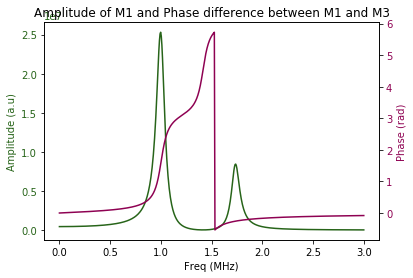

In [10]:
#Plot differences

fig, ax1 = plt.subplots()

color=('#276419')
ax1.set_title('Amplitude of M1 and Phase difference between M1 and M3')
ax1.set_xlabel('Freq (MHz)')
ax1.set_ylabel('Amplitude (a.u)', color=color)
ax1.plot(wd_vals,(amp1_f(wd_vals))**2, color = color)
ax1.tick_params(axis = 'y', labelcolor = color)

ax2 = ax1.twinx()

color=('#8E0152')
ax2.set_ylabel('Phase (rad)', color=color)
ax2.plot(wd_vals,wrap1_f(wd_vals)-wrap3_f(wd_vals), color=color)
ax2.tick_params(axis = 'y', labelcolor = color)

plt.show()

In [5]:
#plot graph of how phase shift at w2 changes with m3

# wrap1_f = sp.lambdify(m3,wrap1)
# wrap3_f = sp.lambdify(m3,wrap3)

# m3_vals = np.linspace(0.1, 3, 500)

# fig, ax1 = plt.subplots()

# color=('#276419')
# ax1.set_title('Phase Difference of M1-M3')
# ax1.set_xlabel('m3')
# ax1.set_ylabel('Phase Difference', color=color)
# ax1.plot(m3_vals,wrap1_f(m3_vals)-wrap3_f(m3_vals), color = color)
# ax1.tick_params(axis = 'y', labelcolor = color)

NameError: name 'wrap1' is not defined

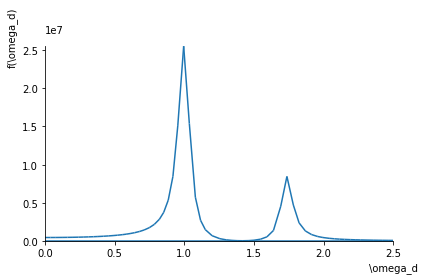

In [9]:
#Make plots with sympy

#sp.plot(amp1**2,delta1,(wd,0,2.5))